In [12]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
IMAGE_SIZE = 224
classes = 2

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Datasetjeruk/training',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 60 images belonging to 2 classes.


In [16]:
class_name = list(train_generator.class_indices.keys())
class_name

['masak', 'tidakmasak']

In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range= 5,
        width_shift_range= 0.1,
        height_shift_range= 0.1, 
        horizontal_flip= True,
        fill_mode= "nearest")

test_generator = test_datagen.flow_from_directory(
          '/content/drive/MyDrive/Datasetjeruk/testing',
        target_size= (IMAGE_SIZE, IMAGE_SIZE), class_mode="sparse")

Found 2 images belonging to 2 classes.


In [18]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [20]:
model.add(Flatten())
model.add(Dense(units=4096, activation= "relu"))
model.add(Dense(units=4096, activation= "relu"))
model.add(Dense(units=2, activation= "softmax"))

In [24]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [26]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    batch_size= 32,
    shuffle= True)

Epoch 1/10
2/2 [==============================] - 158s 80s/step - loss: 3.1344 - accuracy: 0.4333 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 143s 66s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.7070 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 146s 78s/step - loss: 0.7132 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 141s 66s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 142s 76s/step - loss: 0.6949 - accuracy: 0.4000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 138s 73s/step - loss: 0.7007 - accuracy: 0.4333 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 138s 73s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
2/2 [====

In [27]:
scores = model.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.6931 - accuracy: 0.5000


In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 10

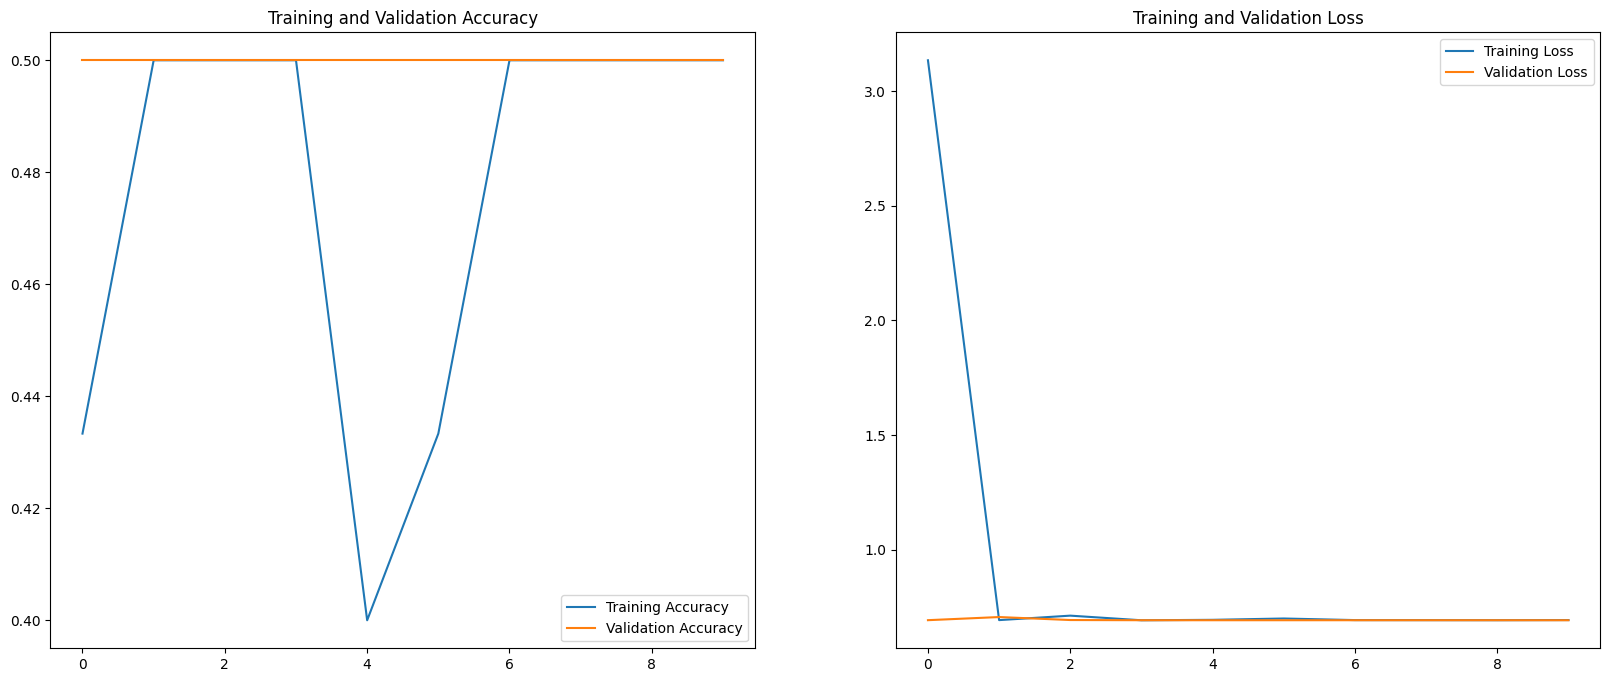

In [29]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 2s 2s/step


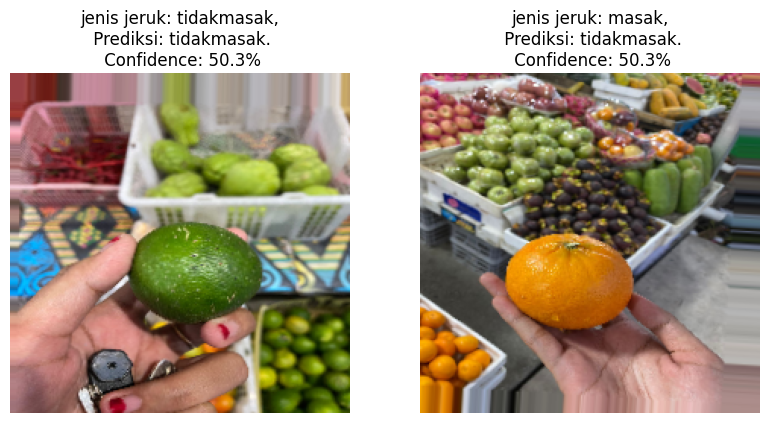

In [31]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(2):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"jenis jeruk: {actual_class},\n Prediksi: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

In [32]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/datasets/datasets jeruk/saved models/model_jeruk_vgg16.h5')